<a href="https://www.kaggle.com/code/averma111/enesmble-crabage-s3e16?scriptVersionId=131623598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [22]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
seed = 42
np.random.seed(seed)
sns.set_style("darkgrid")
pd.set_option('mode.chained_assignment',None)

In [3]:
class Acquisition:
    
    def __init__(self,root_path):
        self.root_path = root_path
        
    def get_dataframe(self,filename):
        return pd.read_csv(os.path.join(self.root_path,filename))
    
    def summary(self,text, df):
        summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
        summary['null'] = df.isnull().sum()
        summary['unique'] = df.nunique()
        summary['min'] = df.min()
        summary['median'] = df.median()
        summary['max'] = df.max()
        summary['mean'] = df.mean()
        summary['std'] = df.std()
        summary['duplicate'] = df.duplicated().sum()
        return summary
    
    def get_dataset_info(self,df):
            return df.info()
    
    
    
acq = Acquisition(root_path='/kaggle/input/playground-series-s3e16')
acq_original = Acquisition(root_path='/kaggle/input/crab-age-prediction')

In [4]:
train = acq.get_dataframe(filename='train.csv')
train=train.set_index('id')
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
original = acq_original.get_dataframe(filename='CrabAgePrediction.csv')
original.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [6]:
acq.summary('train',train)

,dtypes,null,unique,min,median,max,mean,std,duplicate
Sex,object,0,3,F,NaN,M,NaN,NaN,0
Length,float64,0,144,0.1875,1.375000,2.012815,1.317460,0.287757,0
Diameter,float64,0,122,0.1375,1.075000,1.6125,1.024496,0.237396,0
Height,float64,0,65,0.0,0.362500,2.825,0.348089,0.092034,0
Weight,float64,0,3096,0.056699,23.799405,80.101512,23.385217,12.648153,0
Shucked Weight,float64,0,1766,0.028349,9.908150,42.184056,10.104270,5.618025,0
Viscera Weight,float64,0,967,0.042524,4.989512,21.54562,5.058386,2.792729,0
Shell Weight,float64,0,1048,0.042524,6.931453,28.491248,6.723870,3.584372,0
Age,int64,0,28,1,10.000000,29,9.967806,3.175189,0


In [7]:
acq.summary('original',original)

,dtypes,null,unique,min,median,max,mean,std,duplicate
Sex,object,0,3,F,NaN,M,NaN,NaN,0
Length,float64,0,134,0.1875,1.362500,2.0375,1.311306,0.300431,0
Diameter,float64,0,111,0.1375,1.062500,1.625,1.020893,0.248233,0
Height,float64,0,51,0.0,0.362500,2.825,0.349374,0.104976,0
Weight,float64,0,2343,0.056699,22.792998,80.101512,23.567275,13.891201,0
Shucked Weight,float64,0,1482,0.028349,9.539607,42.184056,10.207342,6.275275,0
Viscera Weight,float64,0,867,0.014175,4.861939,21.54562,5.136546,3.104133,0
Shell Weight,float64,0,907,0.042524,6.662133,28.491248,6.795844,3.943392,0
Age,int64,0,28,1,10.000000,29,9.954791,3.220967,0


In [8]:
fulldata = pd.concat([train,original])
acq.summary('fulldata',fulldata)

,dtypes,null,unique,min,median,max,mean,std,duplicate
Sex,object,0,3,F,NaN,M,NaN,NaN,0
Length,float64,0,146,0.1875,1.375000,2.0375,1.317153,0.288404,0
Diameter,float64,0,123,0.1375,1.075000,1.625,1.024316,0.237949,0
Height,float64,0,65,0.0,0.362500,2.825,0.348154,0.092723,0
Weight,float64,0,3099,0.056699,23.728531,80.101512,23.394310,12.713088,0
Shucked Weight,float64,0,1769,0.028349,9.879801,42.184056,10.109418,5.652666,0
Viscera Weight,float64,0,970,0.014175,4.975337,21.54562,5.062290,2.809131,0
Shell Weight,float64,0,1050,0.042524,6.874754,28.491248,6.727465,3.603159,0
Age,int64,0,28,1,10.000000,29,9.967156,3.177472,0


In [9]:
print(f'The count of fulldataset is:{acq.get_dataset_info(fulldata)}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77944 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.9+ MB
The count of fulldataset is:None


In [14]:
class Get_features_label:
    
    def get_features_label(self,df):
        
        features = df.loc[:, ~df.columns.isin(['Age'])]
        label = df['Age']
        
        return features,label
    
    
feat_label = Get_features_label()
feature,label=feat_label.get_features_label(fulldata)

In [18]:
class Column_selector:
    
    def make_selector(self,feature):
        cat_selector = make_column_selector(dtype_include=object)
        num_selector = make_column_selector(dtype_include=np.float)
        return cat_selector,num_selector


cs = Column_selector()
cat_selector,num_selector = cs.make_selector(feature)

In [20]:
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                ('ordinalencoder',
                                 OrdinalEncoder(encoded_missing_value=-2,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])

In [23]:
cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])

In [24]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])),
                ('lassocv', LassoCV())])

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [26]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
)
gbdt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=0))])

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(encoded_missing_value=-2,
                                                                                                handle_unknown='use_encoded_value',
                                                                                                unknown_v...
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece6a4b670>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(encoded_missing_value=-2,
                                                                                                handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cece5dada20>)])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(random_state=0))]))],
                  final_estimator=RidgeCV())

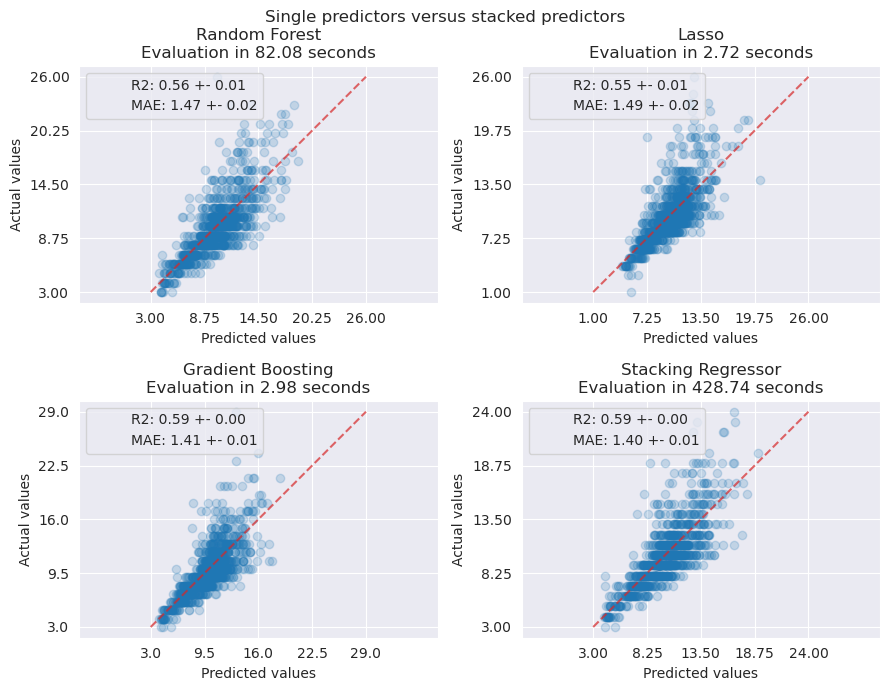

In [31]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_validate, cross_val_predict

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

    start_time = time.time()
    scores = cross_validate(
        est, feature, label, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, feature, label, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }

    display = PredictionErrorDisplay.from_predictions(
        y_true=label,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        ax=ax,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()